<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            1. Introduction
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    In today's competitive market, customer satisfaction is a key differentiator for success. A significant part of the customer experience involves how efficiently and effectively their complaints are handled. For large companies that receive thousands of customer complaints daily across various product lines, manual sorting and routing is a major operational bottleneck. This process is not only labor-intensive and costly but also prone to human error, leading to significant delays in resolution.

This project addresses this challenge by developing an intelligent system for automated complaint categorization. By leveraging Natural Language Processing (NLP) and a range of machine learning and deep learning models, this solution can analyze the text of a customer's complaint and automatically assign it to the correct product category. This automation streamlines the entire workflow, ensuring that complaints reach the right team promptly, thereby accelerating resolution times and enhancing customer satisfaction.
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        <b>Business Context:</b><br>
The current manual process of handling customer complaints presents several critical business challenges:
        <br>

<li><b>High Operational Costs:</b> A dedicated team of employees is required to read, understand, and categorize each complaint, leading to significant labor costs.</li>
<li><b>Slow Response Times:</b> Manual sorting creates a time lag between when a complaint is received and when it is assigned to the appropriate department for action. This delay directly impacts the overall resolution time.</li>
<li><b>Customer Dissatisfaction (Churn):</b> When customers feel their issues are not being addressed promptly, their frustration increases. Inefficient complaint handling is a primary driver of customer churn, leading to loss of revenue and brand reputation damage.</li>
<li><b>Inconsistent Categorization:</b> Human agents may interpret and categorize similar complaints differently, leading to inconsistent data and making it difficult to analyze root causes or identify trends in product issues.</li>
<br>
Automating this process is crucial for mitigating these risks and turning the customer support center from a cost center into a value-driver that helps retain customers.

    </span>
</p>

<hr>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        The primary objective of this project is to develop and deploy a robust machine learning model that accurately classifies customer complaints into their respective product categories based on the complaint text.
<br>
Key goals include:
    </span>
    <ol>
    <span style='font-family:Georgia'>
        <li><b>Reduce Manual Effort:</b> Automate the initial step of complaint routing to free up customer service agents to focus on problem-solving rather than administrative sorting.</li>
        <li><b>Improve Response Time:</b> Decrease the time it takes for a complaint to be assigned to the correct team, thereby speeding up the resolution process.</li>
        <li><b>Enhance Customer Satisfaction:</b> Provide a better customer experience through faster and more accurate complaint handling, which is a key factor in customer retention.</li>
        
    </span>
</ol>
</p>

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            2. Imports and Reading data
            </span>   
        </font>    
</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("rows.csv")

/tmp/ipython-input-2-627803143.py:1: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("rows.csv")


In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            3. Exploratory Data Analysis
            </span>   
        </font>    
</h2>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [ ]:
print("--- Dataset Overview ---")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

--- Dataset Overview ---
Number of rows: 1282355
Number of columns: 18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via                 1282355 non-

In [ ]:
df=df.dropna(subset=['Consumer complaint narrative'])

In [ ]:
df.shape

(383564, 18)

In [ ]:
df = df.dropna(subset=['Consumer disputed?'])

In [ ]:
df.shape

(164076, 18)

In [ ]:
df['Consumer disputed?'].value_counts()

,count
Consumer disputed?,
No,128269
Yes,35807


In [ ]:
df['Consumer disputed?'].value_counts(normalize=True)

,proportion
Consumer disputed?,
No,0.781766
Yes,0.218234


/tmp/ipython-input-18-2384644267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Consumer disputed?', palette='viridis')


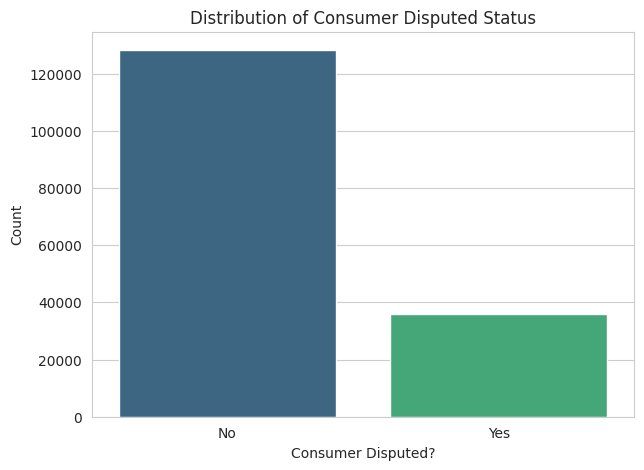

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Consumer disputed?', palette='viridis')
plt.title('Distribution of Consumer Disputed Status')
plt.xlabel('Consumer Disputed?')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This bar chart illustrates a significant imbalance in the consumer disputed status. The vast majority of cases, approximately 130,000, are not disputed, whereas a much smaller portion, around 35,000, are disputed. This class imbalance is a crucial insight, especially for predictive modeling, as it could bias a model towards the majority "No" category.
    </span>    
</div>

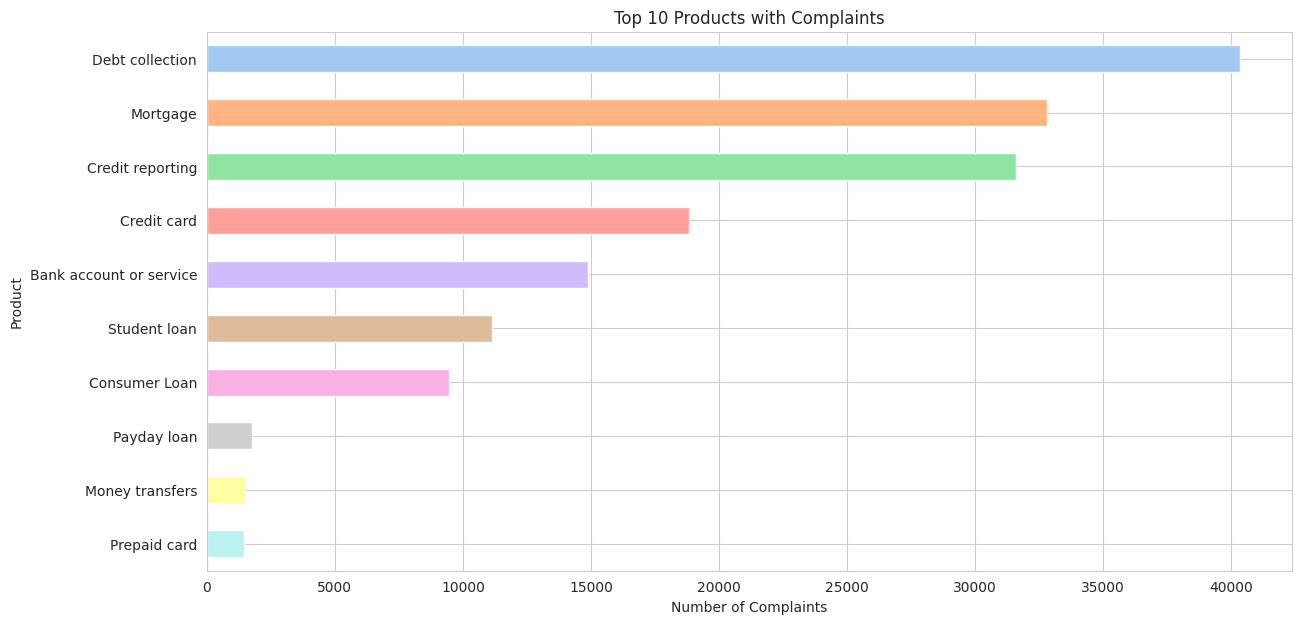

In [ ]:
plt.figure(figsize=(14, 7))
df['Product'].value_counts().head(10).plot(kind='barh', color=sns.color_palette("pastel"))
plt.title('Top 10 Products with Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This chart reveals that "Debt collection," "Mortgage," and "Credit reporting" are by far the most complained-about financial products. These top three categories significantly outnumber the others, indicating that consumer grievances are predominantly concentrated in areas related to debt and credit management.
    </span>    
</div>

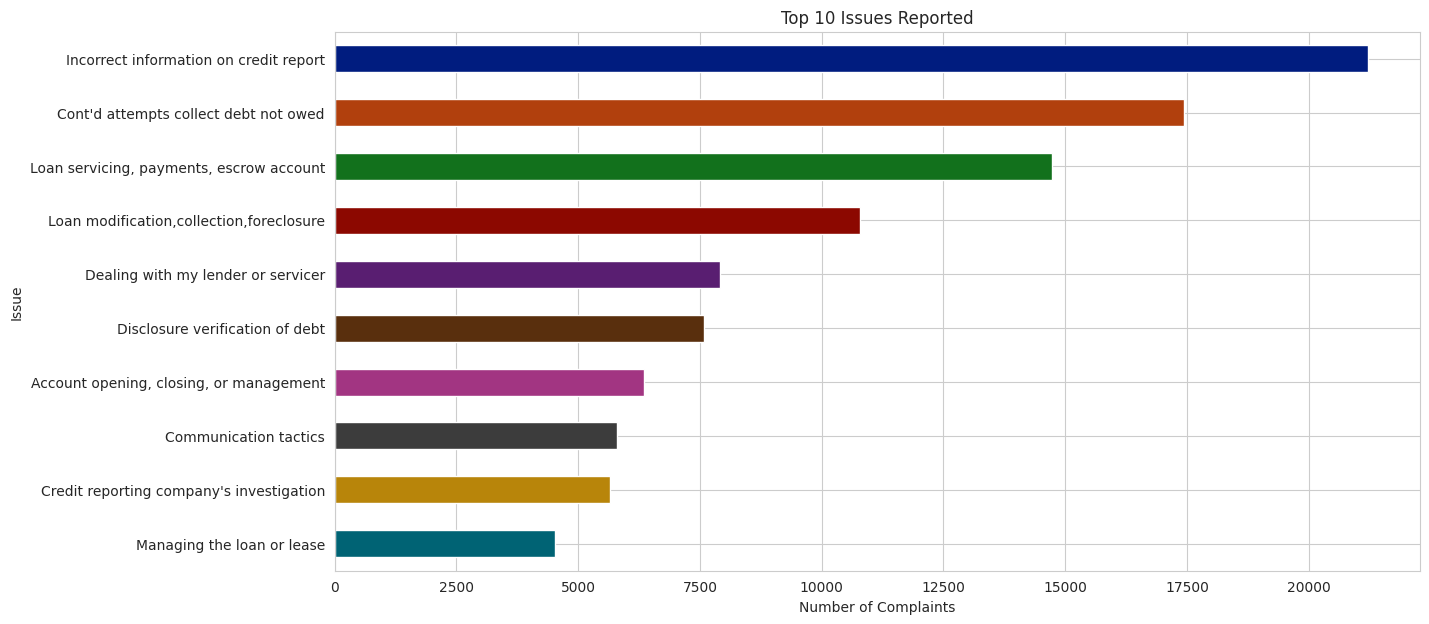

In [ ]:
plt.figure(figsize=(14, 7))
df['Issue'].value_counts().head(10).plot(kind='barh', color=sns.color_palette("dark"))
plt.title('Top 10 Issues Reported')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.gca().invert_yaxis()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The chart shows that "Incorrect information on credit report" is the most significant issue, making data accuracy the primary source of consumer complaints. Following this are issues with "Cont'd attempts to collect debt not owed" and loan servicing, indicating that improper debt collection and loan management are also major areas of concern.
    </span>    
</div>

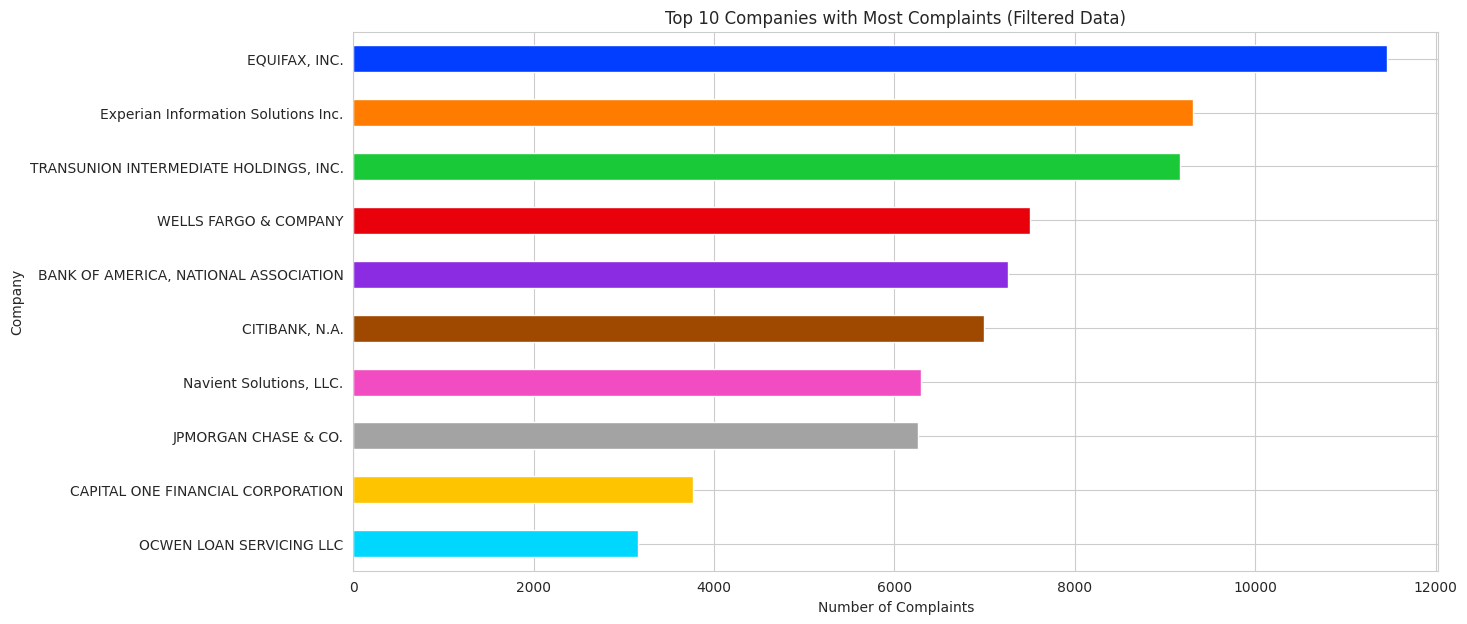

In [ ]:
plt.figure(figsize=(14, 7))
df['Company'].value_counts().head(10).plot(kind='barh', color=sns.color_palette("bright"))
plt.title('Top 10 Companies with Most Complaints (Filtered Data)')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.gca().invert_yaxis()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This chart clearly shows that the three major credit bureaus—Equifax, Experian, and TransUnion—are the most complained-about companies. Their dominance on this list directly correlates with the previous finding that "incorrect information on credit reports" is the number one consumer issue. While several large banks also make the top 10, the volume of complaints against them is substantially lower than that against the credit reporting agencies.
    </span>    
</div>

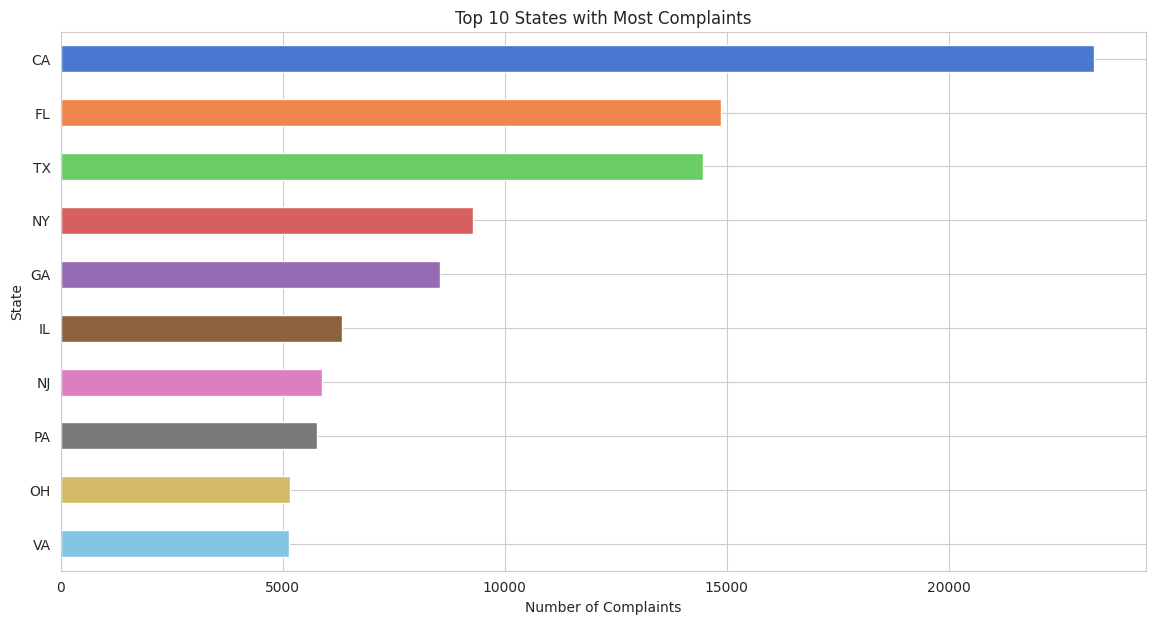

In [ ]:
plt.figure(figsize=(14, 7))
df['State'].value_counts().head(10).plot(kind='barh', color=sns.color_palette("muted"))
plt.title('Top 10 States with Most Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This chart shows the geographic distribution of complaints, with California (CA) having the highest number by a significant margin—over 22,500. Florida (FL) and Texas (TX) follow, forming a clear top three. The prominence of these highly populous states suggests that the number of complaints is likely correlated with the size of the state's population.
    </span>    
</div>

In [ ]:
narratives_length = df['Consumer complaint narrative'].apply(len)
print(f"Min narrative length: {narratives_length.min()} characters")
print(f"Max narrative length: {narratives_length.max()} characters")
print(f"Average narrative length: {narratives_length.mean():.2f} characters")
print(f"Median narrative length: {narratives_length.median()} characters")

Min narrative length: 8 characters
Max narrative length: 5151 characters
Average narrative length: 1039.65 characters
Median narrative length: 737.0 characters


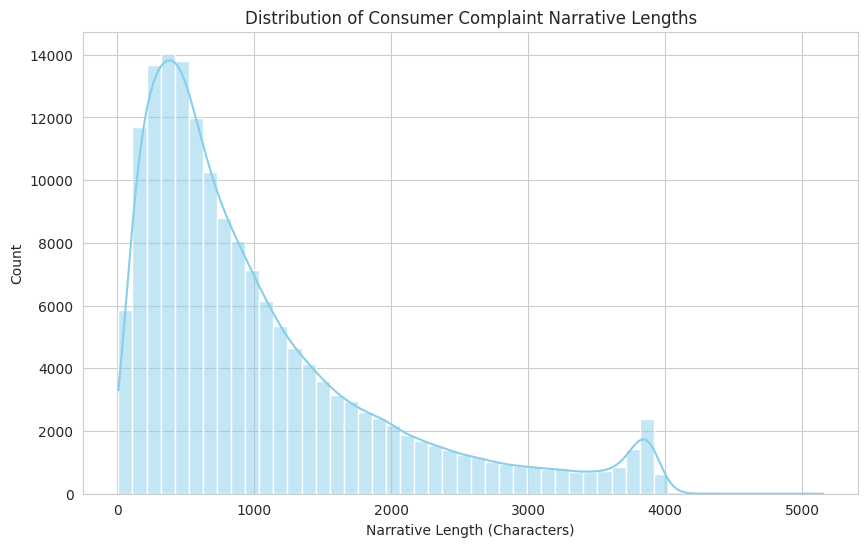

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(narratives_length, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Consumer Complaint Narrative Lengths')
plt.xlabel('Narrative Length (Characters)')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This histogram shows a right-skewed distribution for the length of complaint narratives, meaning most complaints are relatively short, with a peak around 500 characters. There is a notable secondary spike just before the 4,000-character mark, which likely suggests a character limit on the complaint form that many detailed filers are reaching.
    </span>    
</div>

In [ ]:
def clean_text_for_wordcloud(text):
    text = str(text).lower()
    text = re.sub(r'x+', '', text) # Remove 'XXXX' used for PII masking
    text = re.sub(r'\W+', ' ', text) # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

In [ ]:
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'XXXX', 'credit', 'account', 'bank', 'loan', 'company', 'card', 'would',
    'customer', 'called', 'told', 'said', 'money', 'payment', 'phone', 'one',
    'get', 'can', 'also', 'made', 'received', 'time', 'like', 'information',
    'email', 'etc', 'consumer', 'report', 'debt', 'service', 'product', 'sent',
    'day', 'days', 'response', 'disputed', 'dispute', 'complaint', 'complaints',
    'financial', 'agency', 'bureau', 'cfpb', 'federal', 'us', 'new', 'old',
    'back', 'even', 'still', 'see', 'due', 'per', 'without', 'use', 'know',
    'call', 'want', 'make', 'may', 'file', 'given', 'since', 'first', 'go',
    'could', 'came', 'much', 'many', 'take', 'took', 'came', 'come', 'get',
    'going', 'went', 'able', 'able to', 'used', 'using', 'way', 'well', 'etc',
    'dispute', 'disputed', 'timely', 'response', 'yes', 'no', 'nan' # Add 'yes' and 'no' as they are target labels
])

In [ ]:
no_disputed_narratives = df[df['Consumer disputed?'] == 'No']['Consumer complaint narrative']
cleaned_no_disputed_narratives = no_disputed_narratives.apply(clean_text_for_wordcloud)
all_words_no = " ".join(cleaned_no_disputed_narratives.sample(min(50000, len(cleaned_no_disputed_narratives)), random_state=42))

In [ ]:
yes_disputed_narratives = df[df['Consumer disputed?'] == 'Yes']['Consumer complaint narrative']
cleaned_yes_disputed_narratives = yes_disputed_narratives.apply(clean_text_for_wordcloud)
all_words_yes = " ".join(cleaned_yes_disputed_narratives.sample(min(50000, len(cleaned_yes_disputed_narratives)), random_state=42))

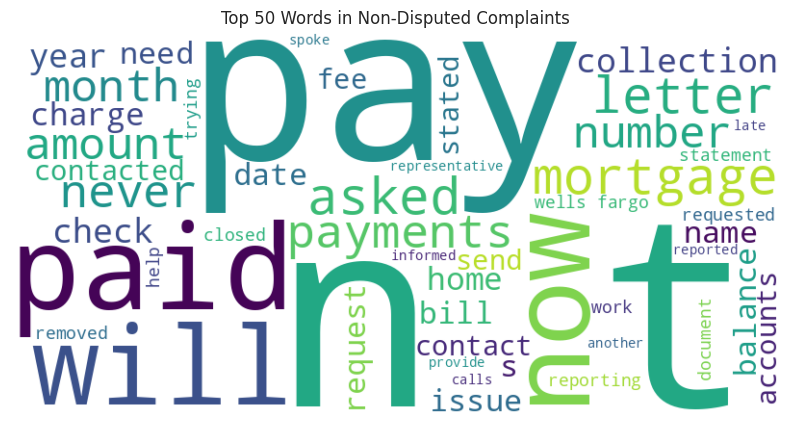

In [ ]:
if all_words_no:
    wordcloud_no = WordCloud(width=800, height=400, background_color='white',
                             stopwords=custom_stopwords, max_words=50,
                             min_font_size=10).generate(all_words_no)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_no, interpolation='bilinear')
    plt.axis('off')
    plt.title('Top 50 Words in Non-Disputed Complaints')
    plt.show()
else:
    print("Not enough text data for 'No' disputed complaints to generate a word cloud.")

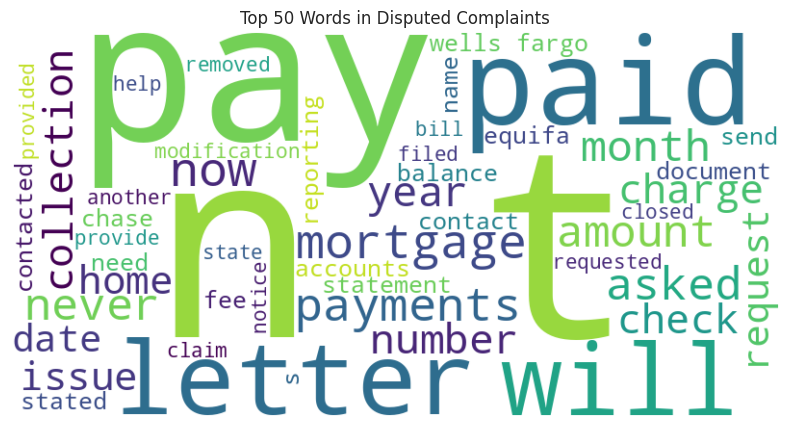

In [ ]:
if all_words_yes:
    wordcloud_yes = WordCloud(width=800, height=400, background_color='white',
                             stopwords=custom_stopwords, max_words=50,
                             min_font_size=10).generate(all_words_yes)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_yes, interpolation='bilinear')
    plt.axis('off')
    plt.title('Top 50 Words in Disputed Complaints')
    plt.show()
else:
    print("Not enough text data for 'Yes' disputed complaints to generate a word cloud.")


--- Relationship between Product and Disputed Status (Filtered Data) ---
Top 10 Products by Percentage of Disputed Complaints:
Consumer disputed?             No       Yes
Product                                    
Virtual currency         0.562500  0.437500
Mortgage                 0.746410  0.253590
Consumer Loan            0.768630  0.231370
Other financial service  0.773973  0.226027
Credit card              0.774074  0.225926
Bank account or service  0.789587  0.210413
Debt collection          0.791909  0.208091
Credit reporting         0.792390  0.207610
Money transfers          0.802271  0.197729
Student loan             0.808234  0.191766


<Figure size 1400x800 with 0 Axes>

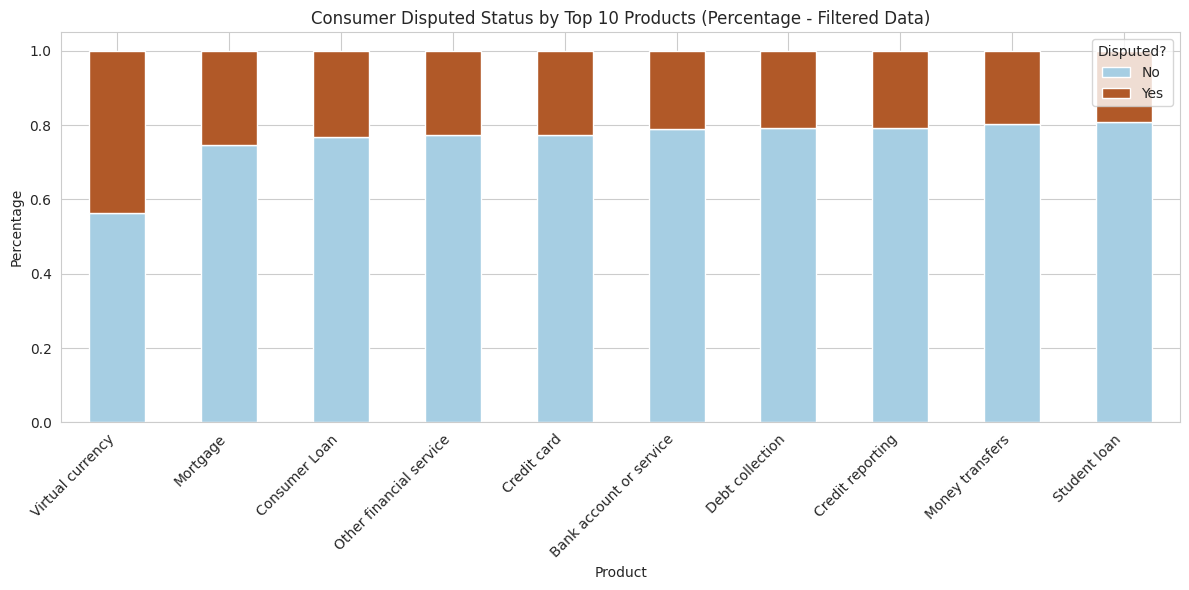


--- EDA Complete ---


In [ ]:
print("\n--- Relationship between Product and Disputed Status (Filtered Data) ---")

# Group by Product and Consumer disputed? to get counts
product_disputed_counts = df.groupby(['Product', 'Consumer disputed?']).size().unstack(fill_value=0)

# Calculate percentages within each product
# This shows the proportion of 'Yes' vs 'No' disputes FOR EACH PRODUCT
product_disputed_percentages = product_disputed_counts.apply(lambda x: x / x.sum(), axis=1)

# Sort by the percentage of 'Yes' disputes to see which products have higher dispute rates
print("Top 10 Products by Percentage of Disputed Complaints:")
print(product_disputed_percentages.sort_values(by='Yes', ascending=False).head(10))

plt.figure(figsize=(14, 8))
product_disputed_percentages.sort_values(by='Yes', ascending=False).head(10).plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Consumer Disputed Status by Top 10 Products (Percentage - Filtered Data)')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disputed?')
plt.tight_layout()
plt.show()

print("\n--- EDA Complete ---")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This 100% stacked bar chart shows that complaints related to "Virtual currency" are disputed by consumers at a much higher rate (around 45%) than any other product category. For all other top products, including mortgages, credit cards, and debt collection, the dispute rate is consistently much lower, hovering around 20-25%. This indicates a significantly greater level of consumer dissatisfaction with complaint resolutions in the virtual currency sector.
    </span>    
</div>